In [1]:
import numpy as np
import cv2 
import  imutils
import pytesseract
import pandas as pd
import time
from matplotlib import pyplot as plt

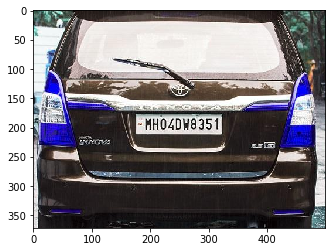

In [2]:
img = cv2.imread('images\car (14).jpeg', cv2.IMREAD_UNCHANGED)
img = imutils.resize(img, width=500)
# cv2.imshow("car.jpeg", img)
plt.imshow(img)

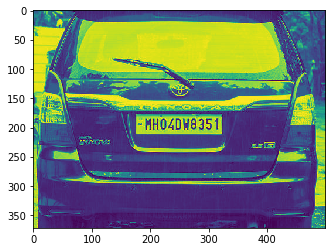

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# cv2.imshow("1 - Grayscale Conversion", gray)
plt.imshow(gray)

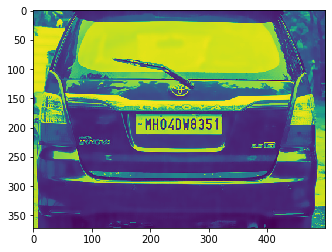

In [4]:
gray = cv2.bilateralFilter(gray, 11, 17, 17)
# cv2.imshow("2 - Bilateral Filter", gray)
plt.imshow(gray)

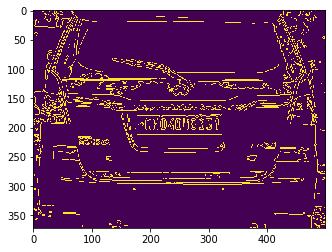

In [5]:
edged = cv2.Canny(gray, 170, 200)
# cv2.imshow("4 - Canny Edges", edged)
plt.imshow(edged)

In [6]:
cnts= cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts=sorted(cnts, key = cv2.contourArea, reverse = True)[:30] 
NumberPlateCnt = None 

In [7]:
count = 0
for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        if len(approx) == 4:  
            NumberPlateCnt = approx 
            break

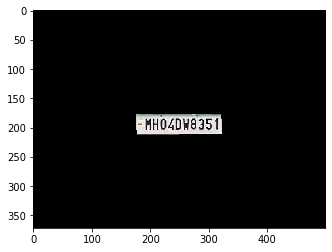

In [8]:
# Masking the part other than the number plate
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[NumberPlateCnt],0,255,-1)
new_image = cv2.bitwise_and(img,img,mask=mask)
# cv2.namedWindow("Final_image",cv2.WINDOW_NORMAL)
# cv2.imshow("Final_image",new_image)
plt.imshow(new_image)

In [9]:
# Configuration for tesseract
config = ('-l eng --oem 1 --psm 3')

# Run tesseract OCR on image
text = pytesseract.image_to_string(new_image, config=config)

#Data is stored in CSV file
raw_data = {'date': [time.asctime( time.localtime(time.time()) )], 
        'v_number': [text]}

df = pd.DataFrame(raw_data, columns = ['date', 'v_number'])
df.to_csv('data.csv')

# Print recognized text
print(text)

cv2.waitKey(0)

MHO4DW8351


-1